<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#PlayGround" data-toc-modified-id="PlayGround-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>PlayGround</a></span></li><li><span><a href="#Main-code" data-toc-modified-id="Main-code-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Main code</a></span></li><li><span><a href="#Test" data-toc-modified-id="Test-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Test</a></span></li><li><span><a href="#Save-gen" data-toc-modified-id="Save-gen-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Save gen</a></span></li></ul></div>

# PlayGround

In [2]:
from fastai.vision import *
from PIL import Image, ImageDraw, ImageFilter, ImageFont

In [3]:
img_test = 'data/celebdata/000001.jpg'

In [8]:
image = Image.open(img_test)
image = image.filter(ImageFilter.FIND_EDGES)

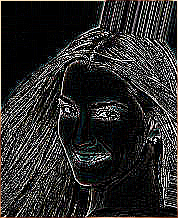

In [9]:
image

In [38]:
img = image
targ_sz = resize_to(img, 96, use_min=True)
img = img.resize(targ_sz, resample=PIL.Image.BILINEAR).convert('RGB')
w, h = img.size
img = img.filter(ImageFilter.FIND_EDGES)
#         img.save(dest)

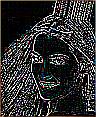

In [39]:
img

In [51]:
img_test = 'data/crappy/000001.jpg'

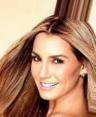

In [53]:
Image.open(img_test)

# Main code

In [1]:
from fastai.vision import *
from PIL import Image, ImageDraw, ImageFilter, ImageFont

In [2]:
from fastai.callbacks import *
from fastai.vision.gan import *

In [3]:
import os

os.environ['TORCH_HOME'] = '/media/subhaditya/DATA/COSMO/Datasets-Useful'

In [4]:
path = Path('data')
path_hr = path/'images'
path_lr = path/'crappy'

In [5]:
class crappifier(object):
    def __init__(self, path_lr, path_hr):
        self.path_lr = path_lr
        self.path_hr = path_hr

    def __call__(self, fn, i):
        dest = self.path_lr/fn.relative_to(self.path_hr)
        dest.parent.mkdir(parents=True, exist_ok=True)
        img = PIL.Image.open(fn)
#         targ_sz = resize_to(img, 96, use_min=True)
#         img = img.resize(targ_sz, resample=PIL.Image.BILINEAR).convert('RGB')
#         w, h = img.size
        img = img.filter(ImageFilter.FIND_EDGES)
        img.save(dest)

In [6]:
def craptest(img):
#     targ_sz = resize_to(img, 96, use_min=True)
#     img = img.resize(targ_sz, resample=PIL.Image.BILINEAR).convert('RGB')
#     w, h = img.size
    img = img.filter(ImageFilter.FIND_EDGES)
    return img

In [7]:
il = ImageList.from_folder(path_hr)

In [8]:
il

ImageList (59048 items)
Image (3, 218, 178),Image (3, 218, 178),Image (3, 218, 178),Image (3, 218, 178),Image (3, 218, 178)
Path: data/images

In [9]:
parallel(crappifier(path_lr, path_hr), il.items)

In [10]:
bs,size=32, 128
# bs,size = 24,160
#bs,size = 8,256
arch = models.resnet34

In [11]:
arch = models.resnet34
src = ImageImageList.from_folder(path_lr).split_by_rand_pct(0.1, seed=42)

In [12]:
def get_data(bs,size):
    data = (src.label_from_func(lambda x: path_hr/x.name)
           .transform(get_transforms(max_zoom=2.), size=size, tfm_y=True)
           .databunch(bs=bs).normalize(imagenet_stats, do_y=True))

    data.c = 3
    return data

In [13]:
data_gen = get_data(bs,size)

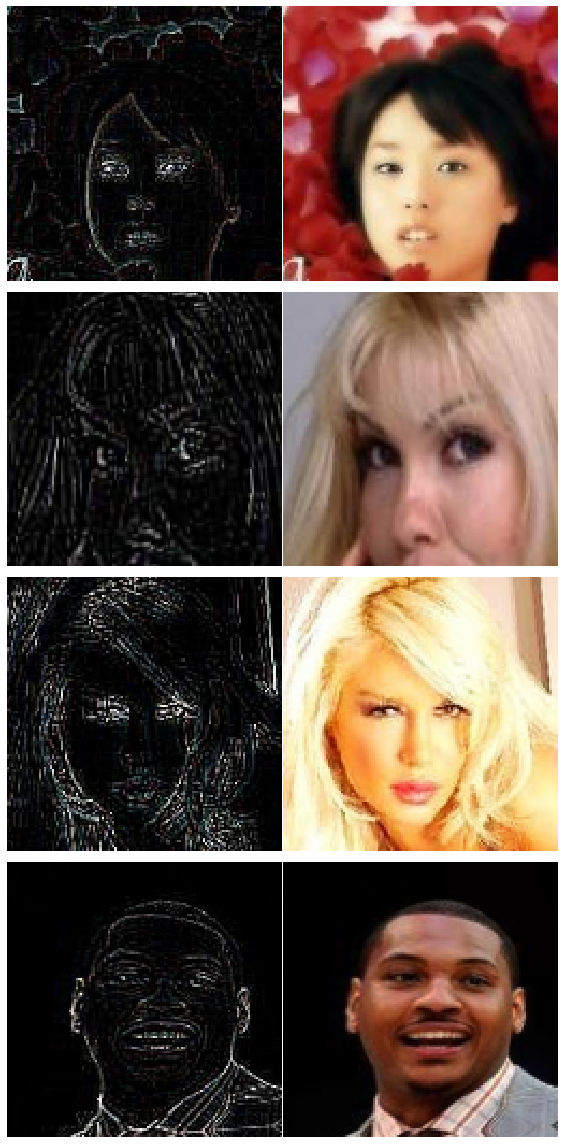

In [14]:
data_gen.show_batch(4)

In [15]:
wd = 1e-3

In [16]:
y_range = (-3.,3.)


In [17]:
loss_gen = MSELossFlat()

In [18]:
def create_gen_learner():
    return unet_learner(data_gen, arch, wd=wd, blur=True, norm_type=NormType.Weight,
                         self_attention=True, y_range=y_range, loss_func=loss_gen)

In [19]:
learn_gen = create_gen_learner()

In [20]:
learn_gen.fit_one_cycle(2, pct_start=0.8)


epoch,train_loss,valid_loss,time
0,0.580490,0.569870,10:34
1,0.388271,0.332890,06:51


In [21]:
learn_gen.unfreeze()

In [22]:
learn_gen.fit_one_cycle(5)

epoch,train_loss,valid_loss,time
0,0.391382,0.342958,07:19
1,0.343686,0.535908,07:16
2,0.275628,0.249165,07:16
3,0.235222,0.214098,07:17
4,0.223858,0.190845,07:17


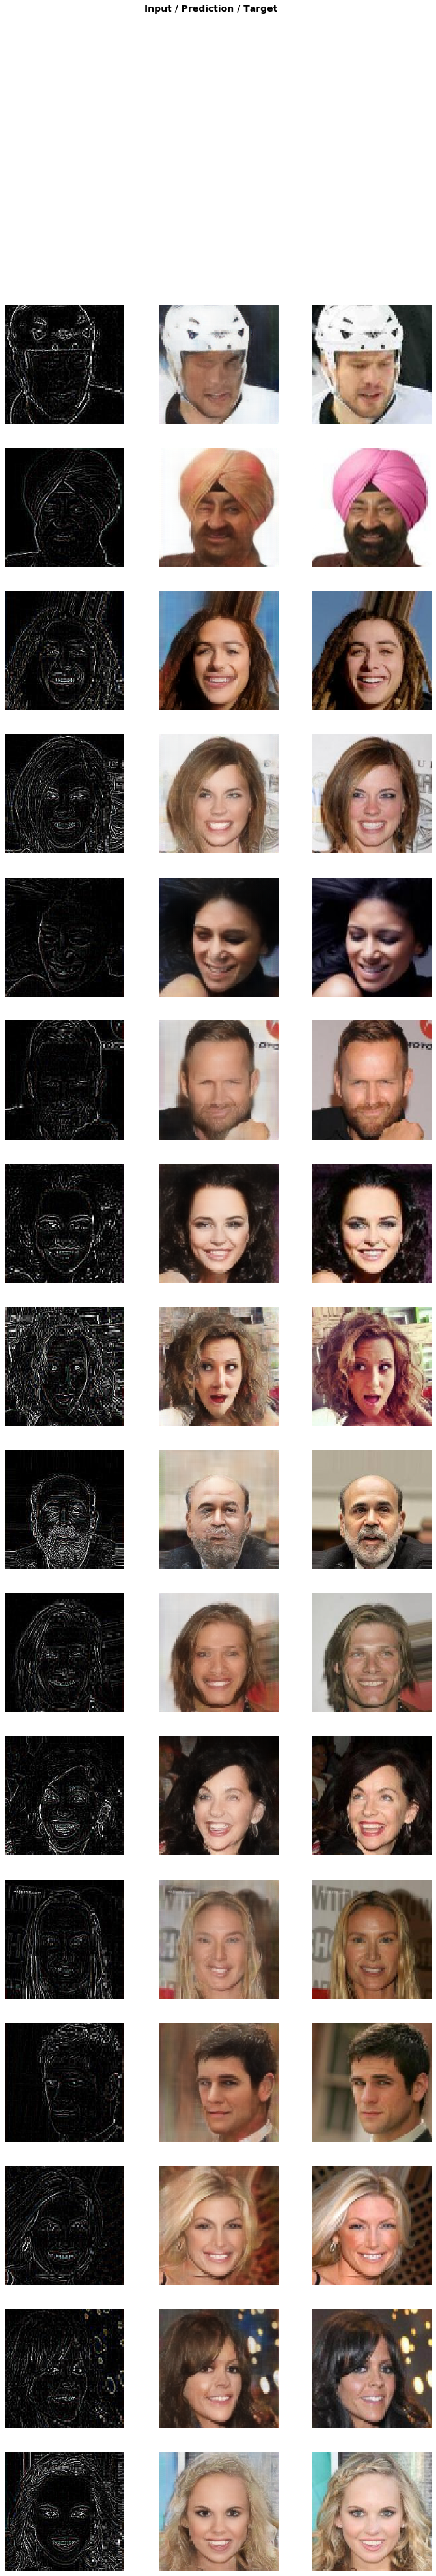

In [23]:
learn_gen.show_results(rows=16)

In [29]:
learn_gen.save('/home/subhaditya/Downloads/gen-pre3')

In [28]:
learn_gen.export('/home/subhaditya/Downloads/learner3')

In [ ]:
# learn_gen.unfreeze()

In [ ]:
# learn_gen.fit_one_cycle(3, slice(1e-6,1e-3))

In [99]:
# learn_gen.show_results(rows=4)

# Test

In [89]:
def craptest(img):
    
    targ_sz = resize_to(img, 96, use_min=True)
    img = img.resize(targ_sz, resample=PIL.Image.BILINEAR).convert('RGB')
    w, h = img.size
    img = img.filter(ImageFilter.FIND_EDGES)
    return img


In [30]:
learn = load_learner('gen-new')
learn.load('gen-pre3')

Learner(data=ImageDataBunch;

Train: LabelList (0 items)
x: ImageImageList

y: ImageList

Path: gen-new;

Valid: LabelList (0 items)
x: ImageImageList

y: ImageList

Path: gen-new;

Test: None, model=DynamicUnet(
  (layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, 

In [128]:
temps = craptest(Image.open(f'/media/subhaditya/DATA/COSMO/PLAYGROUND/outline2Img/test/lenna.jpg')
                     ).save('/media/subhaditya/DATA/COSMO/PLAYGROUND/outline2Img/test/rem.jpg')

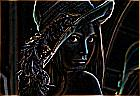

In [129]:
open_image('test/rem.jpg')

In [130]:
end = learn.predict(open_image('test/rem.jpg'))

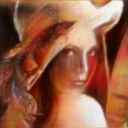

In [131]:
end[0]